# Predicting Terrorist Attacks Damage in India
## Data Preprocessing

### Notebook Configuration

In [0]:
#Libraries imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [0]:
# Configure notebook output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Number of rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

### Load the Datasets
For this project, we are importing terror attacks data in india

In [0]:
# Loading data
df = pd.read_csv('https://query.data.world/s/k4f4l3rfc247unzbxxfdjklle2iuyx', low_memory=False, index_col = 0, na_values=[''])

### Code Book
Python interprets the data types differently than the code book provided by start.

|ATTRIBUTE|PYTHON DTYPE|CODE BOOK TYPE|DEFINITION|
|:----------------|:--------|:------------|:---------------------------------------|
|id|float64|Numeric|sequential case number|
|year|int64|Numeric|The year in which the incident occurred|
|month|int64|Numeric|The month in which the incident occurred.  When the exact month of the incident is unknown, this will be recorded as "0".|
|day|int64|Numeric|The numeric day of the month on which the incident occurred.  When the exact day of the incident is unknown, the field is recorded as "0".|
|country|object|Categorical|Country in which attack took place. Here only India|
|state|object|Categorical|State in which attack took place. 28 categories|
|latitude|float64|Numeric|The latitude of the city in which the event occurred|
|longitude|float64|Numeric|The longitude of the city in which the event occurred.|
|target|object|Categorical|The general type of target/victim. 22 categories|
|weapon|object|Categorical|Records the general type of weapon used in the incident.  Up to four weapon types are recorded for each incident|
|casualties|int64|Numeric|Number of people unavailable for duty due to several circumstances, including death, injury, illness, capture or desertion.|
|injuries|int64|Numeric|Number of injured people|
|total|int64|Numeric|Total loss incurred|


### Inspect the Structure
The data frame contains 14 attributes, one of which is used for the data frame index, and 9940 observations.

In [0]:
# Display a summary of the data frame
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 1185 to 156756
Data columns (total 13 columns):
id            9940 non-null float64
year          9940 non-null int64
month         9940 non-null int64
day           9940 non-null int64
country       9940 non-null object
state         9940 non-null object
latitude      9787 non-null float64
longitude     9787 non-null float64
target        9940 non-null object
weapon        9940 non-null object
casualties    9940 non-null int64
injuries      9940 non-null int64
total         9940 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


### Incident Date
Concatinate the `year`, `month` and `day` attributes to create an incident date.

In [0]:
df.loc[df['day'] == 0, 'day'] = 1
df['incident_date'] = (df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))
df['incident_date'] = pd.to_datetime(df['incident_date'], format="%Y-%m-%d")

df.info(verbose = True)
df.sample(99)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 1185 to 156756
Data columns (total 14 columns):
id               9940 non-null float64
year             9940 non-null int64
month            9940 non-null int64
day              9940 non-null int64
country          9940 non-null object
state            9940 non-null object
latitude         9787 non-null float64
longitude        9787 non-null float64
target           9940 non-null object
weapon           9940 non-null object
casualties       9940 non-null int64
injuries         9940 non-null int64
total            9940 non-null int64
incident_date    9940 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 1.1+ MB


,id,year,month,day,country,state,latitude,longitude,target,weapon,casualties,injuries,total,incident_date
91673,2.009050e+11,2009,5,6,India,Chhattisgarh,18.900000,81.350000,Police,Explosives/Bombs/Dynamite,10,0,10,2009-05-06
127448,2.014020e+11,2014,2,21,India,Odisha,19.809669,85.830978,Government (General),Firearms,0,1,1,2014-02-21
143545,2.015020e+11,2015,2,1,India,Karnataka,15.641310,74.514799,Private Citizens & Property,Firearms,0,0,0,2015-02-01
73234,2.001110e+11,2001,11,3,India,Jammu and Kashmir,33.733336,75.148983,Military,Explosives/Bombs/Dynamite,3,5,8,2001-11-03
99174,2.010110e+11,2010,11,30,India,Manipur,25.099588,93.945765,Government (General),Unknown,0,0,0,2010-11-30
121384,2.013090e+11,2013,9,26,India,Assam,24.585433,92.589132,Private Citizens & Property,Firearms,0,0,0,2013-09-26
70286,2.000050e+11,2000,5,8,India,Maharashtra,19.075984,72.877656,Religious Figures/Institutions,Sabotage Equipment,0,2,2,2000-05-08
109945,2.012080e+11,2012,8,10,India,Odisha,18.363526,81.895253,Military,Explosives/Bombs/Dynamite,0,0,0,2012-08-10
141305,2.014120e+11,2014,12,14,India,Jharkhand,24.053684,86.163095,Police,Firearms,0,0,0,2014-12-14
93857,2.009100e+11,2009,10,15,India,Maharashtra,17.036647,74.604110,Government (General),Firearms,0,0,0,2009-10-15


### View Missing Data
Calculating the total number of null values and percent for each attribute.  As the results show, only 2 attributes are having missing values with 1.4 percent loss of data

In [0]:
# Check the number of missing values in each attribute
count = df.isnull().sum()
percent = round(count / 112251 * 100, 2)
series = [count, percent]
result = pd.concat(series, axis=1, keys=['Count','Percent'])
result.sort_values(by='Count', ascending=False)

,Count,Percent
latitude,153,0.14
longitude,153,0.14
id,0,0.00
year,0,0.00
month,0,0.00
day,0,0.00
country,0,0.00
state,0,0.00
target,0,0.00
weapon,0,0.00


###  Identify the First Pass of Target Attributes
Select the list of attributes that contain missing values of less than 10% and that are not duplicated by another attribute.

In [0]:
target_attrs = result[result['Percent'] < 10]
keep_attrs = target_attrs.index.values

# Remove attributes that duplicate another attribute
keep_attrs = keep_attrs[keep_attrs != 'country']

### Subset the Original Dataset
Only include the attributes in the target set of attributes.

In [0]:
final_df = df.loc[:, keep_attrs]
final_df.info(verbose = True)
final_df.sample(99)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 1185 to 156756
Data columns (total 13 columns):
id               9940 non-null float64
year             9940 non-null int64
month            9940 non-null int64
day              9940 non-null int64
state            9940 non-null object
latitude         9787 non-null float64
longitude        9787 non-null float64
target           9940 non-null object
weapon           9940 non-null object
casualties       9940 non-null int64
injuries         9940 non-null int64
total            9940 non-null int64
incident_date    9940 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 1.1+ MB


,id,year,month,day,state,latitude,longitude,target,weapon,casualties,injuries,total,incident_date
33864,1.988030e+11,1988,3,27,Madhya Pradesh,22.726212,75.862688,Police,Unknown,2,0,2,1988-03-27
31630,1.987070e+11,1987,7,29,Delhi,28.658188,77.227403,Government (General),Firearms,1,0,1,1987-07-29
43490,1.990080e+11,1990,8,2,Andhra Pradesh,15.035369,77.281460,Police,Firearms,7,7,14,1990-08-02
115761,2.013040e+11,2013,4,11,Bihar,24.656056,84.435647,Police,Explosives/Bombs/Dynamite,0,0,0,2013-04-11
43968,1.990090e+11,1990,9,16,Punjab,30.900965,75.857276,Police,Firearms,5,0,5,1990-09-16
153836,2.015100e+11,2015,10,15,Odisha,18.972262,82.320771,Private Citizens & Property,Firearms,2,0,2,2015-10-15
139716,2.014110e+11,2014,11,3,Manipur,24.879423,93.929199,Terrorists/Non-State Militia,Explosives/Bombs/Dynamite,1,0,1,2014-11-03
146389,2.015040e+11,2015,4,12,Punjab,32.033863,75.399438,Violent Political Party,Firearms,0,1,1,2015-04-12
76569,2.004060e+11,2004,6,18,Jammu and Kashmir,34.210873,74.344451,Police,Explosives/Bombs/Dynamite,7,0,7,2004-06-18
32381,1.987100e+11,1987,10,20,Delhi,28.632381,77.220004,Police,Firearms,1,0,1,1987-10-20


### View a Sample of Data for Missing Values in Categorical Variables
Printing a sample of dataframe

In [0]:
final_df.info(verbose = True)
final_df.sample(99)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 1185 to 156756
Data columns (total 13 columns):
id               9940 non-null float64
year             9940 non-null int64
month            9940 non-null int64
day              9940 non-null int64
state            9940 non-null object
latitude         9787 non-null float64
longitude        9787 non-null float64
target           9940 non-null object
weapon           9940 non-null object
casualties       9940 non-null int64
injuries         9940 non-null int64
total            9940 non-null int64
incident_date    9940 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 1.1+ MB


,id,year,month,day,state,latitude,longitude,target,weapon,casualties,injuries,total,incident_date
153888,2.015100e+11,2015,10,16,Chhattisgarh,20.268231,81.490906,Private Citizens & Property,Melee,1,0,1,2015-10-16
58578,1.995030e+11,1995,3,1,Bihar,25.779565,84.749889,Violent Political Party,Firearms,2,4,6,1995-03-01
153023,2.015090e+11,2015,9,22,Andhra Pradesh,15.377366,78.924939,Educational Institution,Melee,0,1,1,2015-09-22
100269,2.011020e+11,2011,2,22,Andhra pradesh,17.727260,81.189156,Business,Incendiary,0,0,0,2011-02-22
23362,1.984100e+11,1984,10,4,Punjab,31.633979,74.872264,Private Citizens & Property,Explosives/Bombs/Dynamite,0,3,3,1984-10-04
77291,2.005010e+11,2005,1,6,Bihar,25.381092,86.464994,Police,Explosives/Bombs/Dynamite,7,0,7,2005-01-06
133077,2.014060e+11,2014,6,11,Jammu and Kashmir,34.207566,74.352882,Government (General),Firearms,0,0,0,2014-06-11
93858,2.009100e+11,2009,10,15,Maharashtra,20.711089,80.472871,Government (General),Firearms,0,0,0,2009-10-15
21626,1.984040e+11,1984,4,15,Punjab,31.147131,75.341218,Transportation,Firearms,0,0,0,1984-04-15
85922,2.008030e+11,2008,3,19,Jammu and Kashmir,34.083658,74.797368,Police,Explosives/Bombs/Dynamite,0,24,24,2008-03-19


### Fix Missing Values
The above sample of data show us that there are Categorical data has some values missing with their entries as 'Unknown'. It also has missing data in numerical variables which speaks about geographical location of attack

In [0]:
# Categorical Variables
# ---------------------
final_df['target'] = final_df['target'].replace(regex='Unknown', value='Others/Unknown') 

final_df['weapon'] = final_df['weapon'].replace(regex='Unknown', value='Others/Unknown')


# Numeric Variables
# -----------------
final_df.dropna(subset = ['latitude', 'longitude'], how='all', inplace=True)

final_df.info(verbose = True)
final_df.sample(99)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9787 entries, 1185 to 156756
Data columns (total 13 columns):
id               9787 non-null float64
year             9787 non-null int64
month            9787 non-null int64
day              9787 non-null int64
state            9787 non-null object
latitude         9787 non-null float64
longitude        9787 non-null float64
target           9787 non-null object
weapon           9787 non-null object
casualties       9787 non-null int64
injuries         9787 non-null int64
total            9787 non-null int64
incident_date    9787 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 1.0+ MB


,id,year,month,day,state,latitude,longitude,target,weapon,casualties,injuries,total,incident_date
100826,2.011040e+11,2011,4,4,Bihar,24.749905,84.370896,Business,Others/Unknown,0,5,5,2011-04-04
87324,2.008060e+11,2008,6,16,Jharkhand,24.404149,86.326267,Transportation,Explosives/Bombs/Dynamite,0,0,0,2008-06-16
133739,2.014060e+11,2014,6,26,Maharashtra,20.184871,79.994796,Police,Firearms,2,0,2,2014-06-26
106778,2.012040e+11,2012,4,11,Chhattisgarh,20.271944,81.493056,Police,Explosives/Bombs/Dynamite,0,0,0,2012-04-11
69332,1.999090e+11,1999,9,6,Tripura,23.997294,91.990600,Government (General),Firearms,0,0,0,1999-09-06
113761,2.013010e+11,2013,1,24,Manipur,24.768148,93.893488,Others/Unknown,Explosives/Bombs/Dynamite,0,0,0,2013-01-24
51305,1.992050e+11,1992,5,10,Delhi,28.632381,77.220004,Government (General),Firearms,1,0,1,1992-05-10
72300,2.001060e+11,2001,6,15,Andhra Pradesh,18.438555,79.128841,Terrorists/Non-State Militia,Firearms,10,0,10,2001-06-15
105975,2.012030e+11,2012,3,3,Meghalaya,25.848178,90.406702,Private Citizens & Property,Firearms,0,0,0,2012-03-03
75364,2.003040e+11,2003,4,15,Bihar,24.782413,85.692921,Police,Explosives/Bombs/Dynamite,5,0,5,2003-04-15


### Convert Attributes to Categorical
Converting a subset of the data frame attributes to categorical to align with the code book. Converting attributes to categorical reduces memory requirements and notifies other libraries to treat the attribute accordingly (Pandas, n.d.).In this case memory reduces by around 30%

In [0]:
# List of attributes that are categorical
cat_attrs = ['target', 'weapon']

for cat in cat_attrs:
    final_df[cat] = final_df[cat].astype('category')
    
final_df.info(verbose = True)
final_df.sample(99)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9787 entries, 1185 to 156756
Data columns (total 13 columns):
id               9787 non-null float64
year             9787 non-null int64
month            9787 non-null int64
day              9787 non-null int64
state            9787 non-null object
latitude         9787 non-null float64
longitude        9787 non-null float64
target           9787 non-null category
weapon           9787 non-null category
casualties       9787 non-null int64
injuries         9787 non-null int64
total            9787 non-null int64
incident_date    9787 non-null datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 937.8+ KB


,id,year,month,day,state,latitude,longitude,target,weapon,casualties,injuries,total,incident_date
94501,2.009120e+11,2009,12,10,Assam,26.814677,92.593671,Private Citizens & Property,Explosives/Bombs/Dynamite,3,15,18,2009-12-10
75453,2.003050e+11,2003,5,9,Jammu and Kashmir,34.020919,74.999776,Government (General),Firearms,1,0,1,2003-05-09
96154,2.010040e+11,2010,4,29,Assam,25.163377,93.012589,Police,Explosives/Bombs/Dynamite,0,0,0,2010-04-29
152126,2.015080e+11,2015,8,30,Andhra Pradesh,18.306735,82.487842,Terrorists/Non-State Militia,Melee,1,0,1,2015-08-30
47836,1.991080e+11,1991,8,30,Punjab,30.802259,76.076175,Terrorists/Non-State Militia,Firearms,4,0,4,1991-08-30
79036,2.005100e+11,2005,10,29,Delhi,28.632381,77.220004,Private Citizens & Property,Explosives/Bombs/Dynamite,20,0,20,2005-10-29
127452,2.014020e+11,2014,2,21,Jammu and Kashmir,34.287077,74.466606,Private Citizens & Property,Firearms,1,0,1,2014-02-21
141102,2.014120e+11,2014,12,8,Jharkhand,23.598803,85.826789,Military,Explosives/Bombs/Dynamite,0,0,0,2014-12-08
80663,2.006050e+11,2006,5,23,Jammu and Kashmir,34.048248,74.783444,Military,Explosives/Bombs/Dynamite,2,26,28,2006-05-23
114184,2.013020e+11,2013,2,10,Bihar,25.540785,85.268411,Private Citizens & Property,Firearms,0,0,0,2013-02-10


### Summary Statistics
The following table depicts the summary statistics.

In [0]:
final_df.describe(percentiles = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
id,9787.0,2.004476e+11,9.774398e+08,1.972020e+11,1.989050e+11,1.992080e+11,2.000040e+11,2.005100e+11,2.009040e+11,2.010090e+11,2.012030e+11,2.013090e+11,2.014110e+11,2.015120e+11,2.015120e+11
year,9787.0,2.004411e+03,9.772834e+00,1.972000e+03,1.989000e+03,1.992000e+03,2.000000e+03,2.005000e+03,2.009000e+03,2.010000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.015000e+03
month,9787.0,6.459794e+00,3.312261e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.200000e+01
day,9787.0,1.555093e+01,8.760380e+00,1.000000e+00,3.000000e+00,7.000000e+00,1.000000e+01,1.300000e+01,1.500000e+01,1.800000e+01,2.100000e+01,2.500000e+01,2.800000e+01,3.100000e+01,3.100000e+01
latitude,9787.0,2.614049e+01,5.566877e+00,8.180270e+00,1.879167e+01,2.200870e+01,2.375558e+01,2.478065e+01,2.549701e+01,2.647947e+01,3.034000e+01,3.269479e+01,3.406994e+01,3.460694e+01,3.460694e+01
longitude,9787.0,8.276616e+01,7.096257e+00,6.877572e+01,7.479737e+01,7.501443e+01,7.585728e+01,7.970144e+01,8.189060e+01,8.468000e+01,8.689478e+01,9.103707e+01,9.383525e+01,9.591895e+01,9.591895e+01
casualties,9787.0,1.802289e+00,4.958961e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,1.880000e+02,1.880000e+02
injuries,9787.0,2.744150e+00,1.219573e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,8.170000e+02,8.170000e+02
total,9787.0,4.546439e+00,1.545482e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01,1.005000e+03,1.005000e+03


### Inspect the Final Structure
The data frame contains 11 attributes, one of which is used for the data frame index, and 9787 observations.

In [0]:
final_df.info(verbose = True)
final_df.sample(99)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9787 entries, 1185 to 156756
Data columns (total 13 columns):
id               9787 non-null float64
year             9787 non-null int64
month            9787 non-null int64
day              9787 non-null int64
state            9787 non-null object
latitude         9787 non-null float64
longitude        9787 non-null float64
target           9787 non-null category
weapon           9787 non-null category
casualties       9787 non-null int64
injuries         9787 non-null int64
total            9787 non-null int64
incident_date    9787 non-null datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 937.8+ KB


,id,year,month,day,state,latitude,longitude,target,weapon,casualties,injuries,total,incident_date
104807,2.012010e+11,2012,1,7,Jammu and Kashmir,34.297023,74.478958,Police,Explosives/Bombs/Dynamite,1,0,1,2012-01-07
122030,2.013100e+11,2013,10,14,Jammu and Kashmir,34.138625,74.799533,Police,Explosives/Bombs/Dynamite,0,0,0,2013-10-14
85729,2.008030e+11,2008,3,1,Assam,26.179222,91.753346,Police,Firearms,1,0,1,2008-03-01
98445,2.010100e+11,2010,10,8,Andhra pradesh,17.248678,80.147376,Private Citizens & Property,Firearms,1,0,1,2010-10-08
93997,2.009100e+11,2009,10,27,West Bengal,22.424109,87.318986,Transportation,Firearms,0,1,1,2009-10-27
102021,2.011060e+11,2011,6,26,Chhattisgarh,20.271944,81.493056,Military,Firearms,3,4,7,2011-06-26
115763,2.013040e+11,2013,4,11,Bihar,24.656056,84.435647,Police,Explosives/Bombs/Dynamite,0,0,0,2013-04-11
100818,2.011040e+11,2011,4,3,Assam,26.444112,91.441360,Transportation,Explosives/Bombs/Dynamite,0,0,0,2011-04-03
115759,2.013040e+11,2013,4,11,Bihar,24.656056,84.435647,Police,Explosives/Bombs/Dynamite,0,0,0,2013-04-11
53646,1.992100e+11,1992,10,31,Jammu and Kashmir,32.726602,74.857026,Transportation,Explosives/Bombs/Dynamite,17,30,47,1992-10-31


### Save the Preprocessed Data
Output the new data frame to a CSV file.

In [0]:
final_df.to_csv("ita_data_preprocessed.csv", sep = ",")

### Attacks by Year
Plot the number of terrorist incidents by year.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


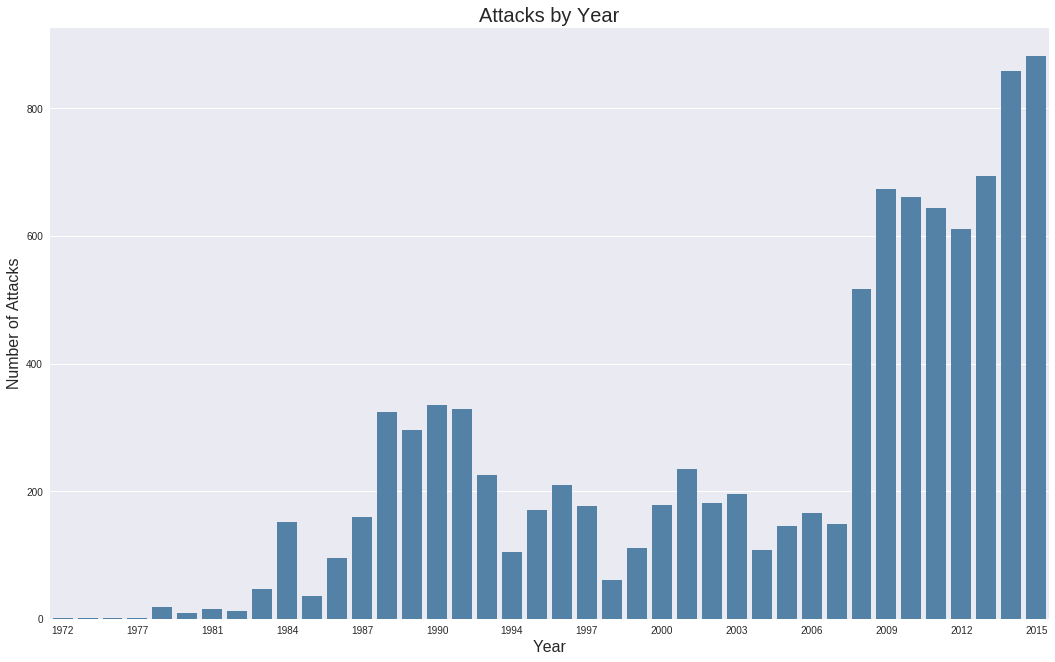

In [0]:
# Make a range of years to show categories with no observations
years = np.arange(1977, 2015)

# Draw a count plot to show the number of attacks each year
plt1 = sns.factorplot("year", data=final_df, kind="count", color='steelblue', size=9, aspect=1.618)
plt1.set_xticklabels(step=3)
_ = plt.title('Attacks by Year', fontsize = 20)
_ = plt.xlabel('Year', fontsize = 16)
_ = plt.ylabel('Number of Attacks', fontsize = 16)
plt.show();

### Attack Locations
Plot a sample of attack locations.

In [0]:
# Get a India map.
map = folium.Map(location=[21, 78], zoom_start=5, tiles='Mapbox Control Room');

# Take a sample of the data points
sample = final_df.sample(3000);

# Draw markers on the map.
for index, row in sample.iterrows():
    folium.CircleMarker([row[5], row[6]], radius=0.3, color='#E74C3C', fill_color='#E74C3C').add_to(map);

# Show the map
map

### Attacks by States in Figures
Further information can be gleaned by examining the attacks by states.

In [0]:
final_df.state.value_counts()

Jammu and Kashmir    1993
Assam                1061
Punjab                927
Manipur               883
Jharkhand             706
Chhattisgarh          654
Bihar                 562
West Bengal           533
Odisha                316
Maharashtra           261
Meghalaya             228
Orissa                221
Andhra Pradesh        220
Delhi                 203
Uttar Pradesh         166
Tamil Nadu            128
Tripura               113
Nagaland              100
Gujarat                62
Karnataka              59
Kerala                 58
Madhya Pradesh         57
Chandigarh             47
Haryana                43
Andhra pradesh         41
Rajasthan              41
Mizoram                26
Himachal Pradesh       23
Uttaranchal            23
Arunachal Pradesh      12
Telangana               9
Goa                     5
Sikkim                  4
Puducherry              1
Malkangiri              1
Name: state, dtype: int64

### Attacks by State
Plot illustrating the total number of attacks by state.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


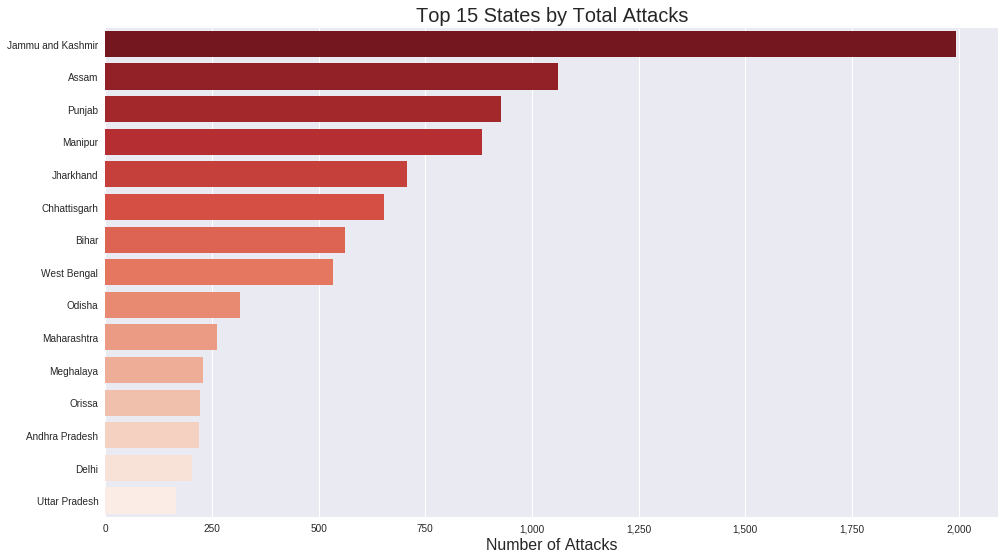

In [0]:
data = final_df[['state']].copy()
data['event_id'] = data.index

# Calculate the number of attacks
data = data.groupby(['state']).agg(['count'])
data = data.reset_index()
data.columns = ['State','Attacks']

# Order attacks descending
data = data.sort_values('Attacks', ascending=False)[0:15]
data = data.reset_index()

# Set the color palette in reverse
colors = sns.color_palette('Reds', len(data))
colors.reverse()
plt.figure(figsize=(16, 9.0))

# Plot bar chart with index as y values
ax = sns.barplot(data.Attacks, data.index, orient='h', palette=colors)
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Reset the y labels
ax.set_yticklabels(data.State)
ax.set_xlabel(xlabel='Number of Attacks', fontsize=16)
ax.set_title(label='Top 15 States by Total Attacks', fontsize=20)
plt.show();

### Attacks by Target Type
Plot depicting the total number of attacks by attack target type.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


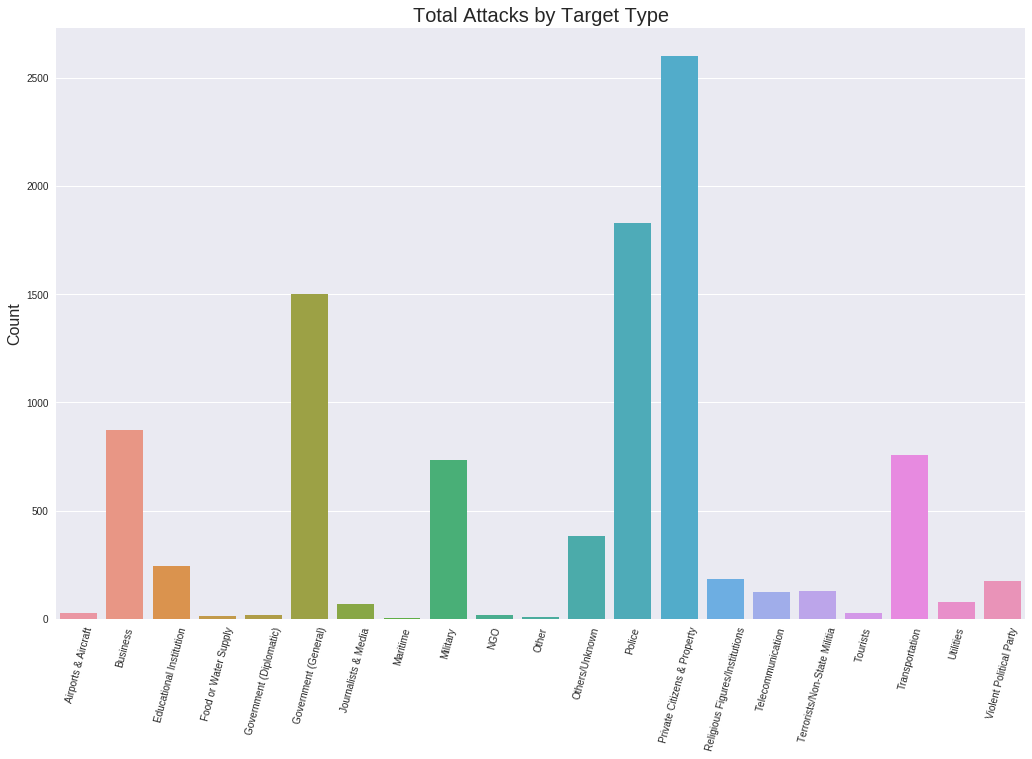

In [0]:
ax = sns.factorplot('target', data=final_df, size=9, aspect=1.618, kind="count")
ax.set_xticklabels(rotation=75)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Target Type', fontsize=20)

plt.show();

### Attacks by Weapon Type
Plot depicting the total number of attacks by attack weapon type.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


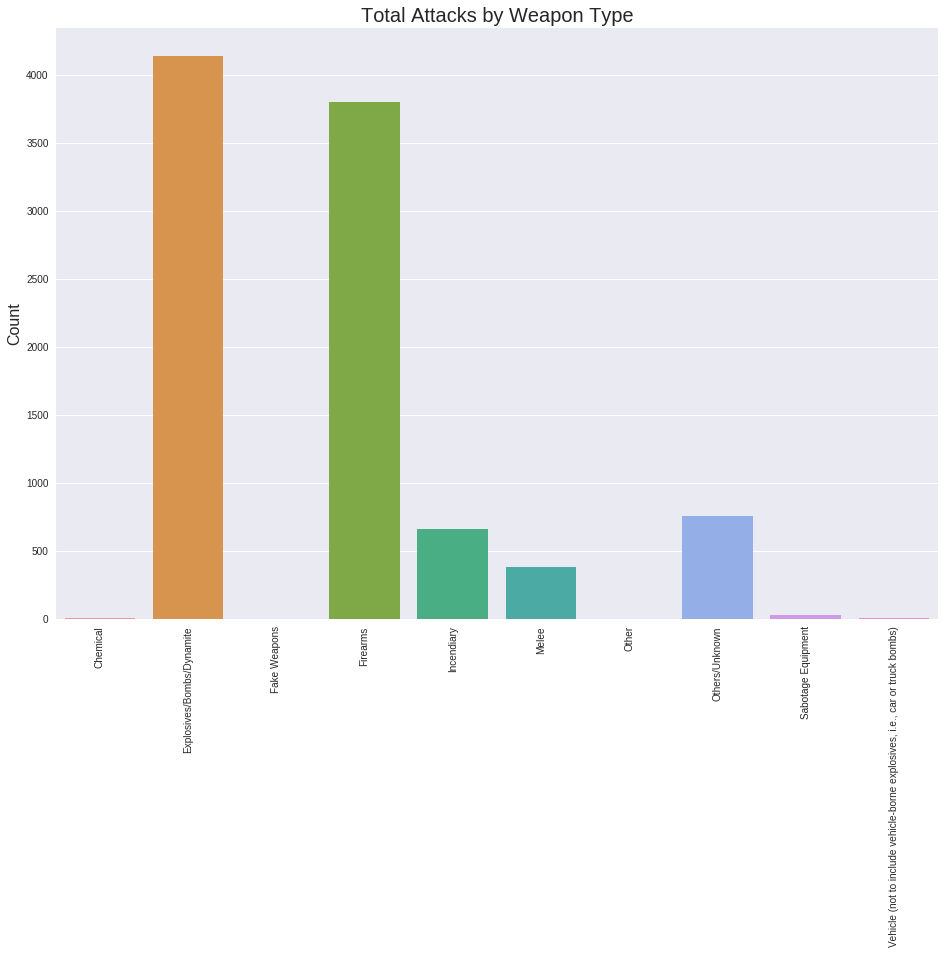

In [0]:
ax = sns.factorplot('weapon', data=final_df, size=9, aspect=1.618, kind="count")
ax.set_xticklabels(rotation=90)
ax = plt.ylabel('Count', fontsize=16)
ax = plt.xlabel('',)
ax = plt.title('Total Attacks by Weapon Type', fontsize=20)

plt.show();

### Create Training and Testing Datasets
The original dataset is split into 70% training and 30% testing.

In [0]:
# Seed for reproducible results
seed = 43

# Predictor variables with one hot encoding
X = pd.get_dummies(final_df[['year', 'month', 'day', 'latitude', 'longitude', 'target', 'weapon']], drop_first = True)

# Labels
y = final_df[['casualties', 'injuries']]

# Create an 70/30 split for training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

X_test.head()
y_test.head()

,year,month,day,latitude,longitude,target_Business,target_Educational Institution,target_Food or Water Supply,target_Government (Diplomatic),target_Government (General),target_Journalists & Media,target_Maritime,target_Military,target_NGO,target_Other,target_Others/Unknown,target_Police,target_Private Citizens & Property,target_Religious Figures/Institutions,target_Telecommunication,target_Terrorists/Non-State Militia,target_Tourists,target_Transportation,target_Utilities,target_Violent Political Party,weapon_Explosives/Bombs/Dynamite,weapon_Fake Weapons,weapon_Firearms,weapon_Incendiary,weapon_Melee,weapon_Other,weapon_Others/Unknown,weapon_Sabotage Equipment,"weapon_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
87236,2008,6,11,21.638690,85.606944,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
131353,2014,5,10,17.191148,77.166556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
153369,2015,10,3,26.712845,88.414940,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
75477,2003,5,13,33.538588,74.369286,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
69900,2000,1,24,34.064508,74.794461,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


,casualties,injuries
87236,0,10
131353,0,0
153369,0,0
75477,1,4
69900,4,6


### Scaling data

In [0]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Finding best estimator for Random forest Regressor

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Effect of n_estimators')

Text(0.5, 0, 'n_estimator')

Text(0, 0.5, 'score')

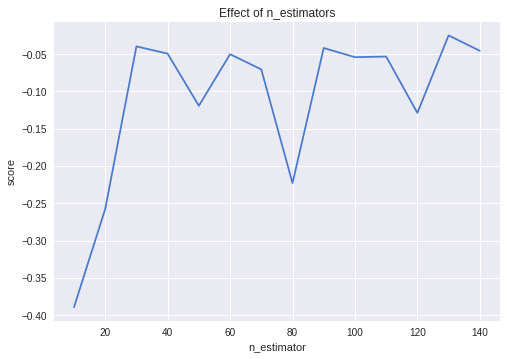

In [0]:
# Establishing model
model = RandomForestRegressor(n_jobs=-1)

# Using different n_estimators
estimators = np.arange(10, 150, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
# Establishing model
model = RandomForestRegressor(n_jobs=-1)

In [0]:

# Establishing model
model = RandomForestRegressor(n_jobs=-1)

### Creating and Fitting Model for Random forest Regressor

In [0]:
rfregressor = RandomForestRegressor(n_estimators=15)  
rfregressor.fit(X_train, y_train)  
y_pred = rfregressor.predict(X_test)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Evaluation Metrics for Random forest Regressor

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 2.5407678514879644
Root Mean Squared Error: 6.728365617988876


###Creating and Fitting model using ANN

In [88]:
mlp = MLPRegressor(hidden_layer_sizes=(68, 68), max_iter=500, early_stopping=True)
mlp.fit(X_train, y_train)  
y_pred = mlp.predict(X_test)  

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(68, 68), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Evaluation Metrics for ANN

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 2.5823005472611436
Root Mean Squared Error: 6.1711918649785105
